## One gene biomarker

In [144]:
#Import module
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



## Input data

In [145]:
#Input data

Expression2=[99.23694104414834, 99.79761601079905, 100.11808491584426, 99.09249696859243, 99.98891444765249, 99.39478962838524, 100.02264569438259, 99.38884901792312, 99.62409351286645, 99.52980301606087, 99.57805233182653, 99.66454129142596, 99.77288502868859, 99.92163185089595, 99.46624300233474, 100.09973062676114, 99.28645120544054, 99.44932088368189, 100.37989554883741, 99.889110828682, 99.29278885690304, 99.97592571433668, 99.7499574862984, 100.12688002888582, 99.31775816423945, 99.91994319547656, 99.9674559074991, 99.95025402637357, 99.86996615908518, 99.80710732141742, 99.63778997529569, 99.77154839735982, 99.93821316157405, 99.47553077181047, 99.59970286052317, 99.64881130284517, 99.94225794465528, 98.8809168580181, 100.19597016524455, 99.95657422828045, 99.51878649859202, 100.17431274883144, 99.58568272890406, 99.98913131223853, 100.01626312181553, 99.88076226477169, 99.2915626685816, 99.22677832275059, 99.38538503594204, 99.036643143779, 99.68999563329919, 99.68011974031101, 99.64692832617186, 100.12141617567461, 99.33587850623472, 99.44880322523208, 99.44282732138265, 99.5887887246546, 99.505579916303, 100.06881717169793, 99.76941031854344, 100.30309598352069, 100.17584119210518, 99.80888073551274, 99.57103153878664, 99.32241890527699, 99.67015987099367, 99.028556135876, 100.02097654006836, 99.91806718165282, 99.58510407399848, 99.69565713687409, 100.18874746922424, 100.24975993976734, 99.60008151974428]
Label2=[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]


Expression=np.asarray(Expression2)
Label=np.asarray(Label2)
print(type(Expression),type(Expression2))
print('Expression',Expression.shape)
print('Label',Label.shape)
print('Label',Label)

<class 'numpy.ndarray'> <class 'list'>
Expression (75,)
Label (75,)
Label [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1
 0]


## Calculate TPR, FPR, micro and macro

In [146]:
# set dictory
Fpr = dict()
Tpr = dict()
Roc_auc = dict()

#calculate FPR, TPR and ROC
Fpr[0], Tpr[0], _= roc_curve(Label, Expression)
Roc_auc[0] = auc(Fpr[0], Tpr[0])

#Calculate micro-FPR, micro-TPR and micro-AUC
Fpr["micro"], Tpr["micro"], _ = roc_curve(Label.ravel(), Expression.ravel())
Roc_auc["micro"] = auc(Fpr["micro"], Tpr["micro"])

# Compute macro-average ROC curve and ROC area


# First aggregate all false positive rates
All_Fpr = np.unique(Fpr[0])


# Then interpolate all ROC curves at this points
mean_Tpr = np.zeros_like(All_Fpr)
mean_Tpr += interp(All_Fpr, Fpr[0], Tpr[0])


# Finally average it and compute AUC

Fpr["macro"] = All_Fpr
Tpr["macro"] = mean_Tpr
Roc_auc["macro"] = auc(Fpr["macro"], Tpr["macro"])


## Plot ROC and AUC

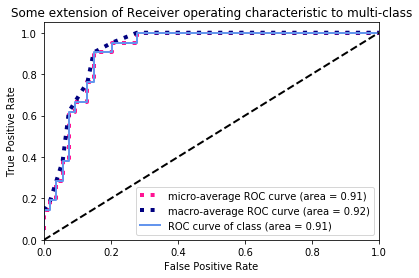

cornflowerblue <class 'str'>
2 <class 'int'>


In [151]:
# Plot all ROC curves
plt.figure()
plt.plot(Fpr["micro"], Tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(Roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(Fpr["macro"], Tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(Roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])


plt.plot(Fpr[0], Tpr[0], color=color, lw=lw,
    label='ROC curve of class (area = {1:0.2f})'
    ''.format(0, Roc_auc[0]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
print(color,type(color))
print(lw,type(lw))